In [20]:
cd Desktop

[Errno 2] No such file or directory: 'Desktop'
/Users/virishatimmaraju/Desktop


In [34]:
#Loading all the necessary packages

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gatspy.periodic import LombScargleFast
# use seaborn for plot styles
import seaborn as sns
seaborn.set()

In [22]:
df = pd.read_table('asu.tsv', sep='\t', header=0, engine = 'python')
df

,Source,ObsTime,FG,e_FG,Gmag
0,4656702360931582080,1666.47,323.34062,6.13959,19.251
1,4656702360931582080,1666.65,286.73588,56.91077,19.381
2,4656702360931582080,1666.72,255.07146,4.62155,19.508
3,4656702360931582080,1666.90,473.93409,3.86381,18.835
4,4656702360931582080,1666.97,368.06375,4.48204,19.110
5,4656702360931582080,1667.15,270.08691,2.90891,19.446
6,4656702360931582080,1667.22,262.13782,3.89487,19.478
7,4656702360931582080,1667.97,398.75304,6.25173,19.023
8,4656702360931582080,1668.15,341.27158,6.70824,19.192
9,4656702360931582080,1668.22,298.41182,5.48293,19.338


In [23]:
#Grouping the objects by their source ids
grouped = df.groupby('Source')
len(grouped)
grouped.size()

Source
4656702360931582080     32
4656714936595899008     41
4656716414064729984     43
4656720846471011200     42
4658879737581295744     36
4658882834232119936     39
4658882868591839488     39
4658883654582897920     20
4658883865024780288     44
4658884380421017984     34
4658885445572591616     52
4658887988195764864     39
4658891870845705600     45
4658892214443139968     32
4658892622455949312     47
4658893142156536960     50
4658896509413320320     39
4658897986882216192     58
4658898497969725952     65
4658898738488020864     66
4658898811515791232     67
4658900701300885760     62
4658900907459273344     54
4658901113617636352     70
4658901285416794624     48
4658902144410047488     71
4658915235475931904     41
4658915750871688704     40
4658917709376306432     43
4658919461723115008     27
                      ... 
5288149139985004032     37
5288333583059787264     36
5288371722370099968     44
5288408659087559936     41
5288415775849385088     40
5288456694002120576  

In [24]:
def createSeries(x):
    ind = x['ObsTime']
    y = x['Gmag']
    y.index = ind
    return y
lightcurves = grouped.apply(createSeries)
inds = lightcurves.index
inds.levels[0] 

Int64Index([4656702360931582080, 4656714936595899008, 4656716414064729984,
            4656720846471011200, 4658879737581295744, 4658882834232119936,
            4658882868591839488, 4658883654582897920, 4658883865024780288,
            4658884380421017984,
            ...
            5476381373147202176, 5476382644456694016, 5476383847050278912,
            5476384774758557952, 5476394739084603904, 5476395391903729152,
            5476395494986338816, 5476395563723293824, 5476395769877623808,
            5476395941659542912],
           dtype='int64', name=u'Source', length=3194)

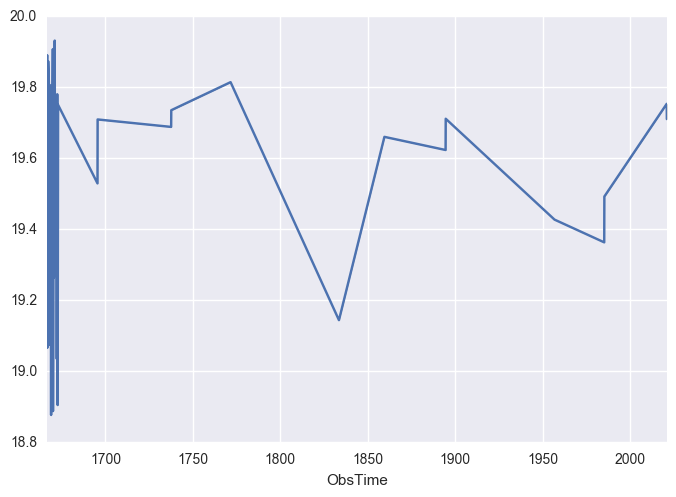

In [51]:
obj_id = inds.levels[0][15] #Considering the 15th object
ax = sns.tsplot(data = lightcurves[obj_id],time=lightcurves[obj_id].index) #Generating the light curve

Finding optimal frequency:
 - Estimated peak width = 0.0177
 - Using 5 steps per peak; omega_step = 0.00355
 - User-specified period range:  0.1 to 1
 - Computing periods at 15953 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Best period: 0.537669310925Barycentric Julian Days 


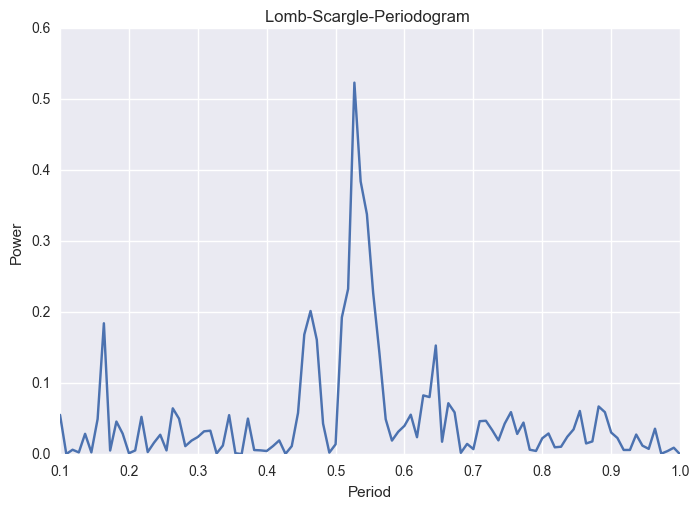

In [40]:
#Calculating the period for irregularly sampled data
ls = LombScargleFast()
ls.optimizer.period_range = (0.1,1.0)
ls.fit(lightcurves[obj_id].index,lightcurves[obj_id])
period = ls.best_period
print("Best period: " + str(period) + "Barycentric Julian Days ")
periods = np.linspace(0.1,1.0,100)
scores = ls.score(periods)
plt.plot(periods,scores)
plt.xlabel("Period")
plt.ylabel("Power")
plt.title("Lomb-Scargle-Periodogram ")